In [1]:
%autosave 180
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

Autosaving every 180 seconds


In [2]:
import pandas as pd
import numpy as np
import pylab as plt

In [3]:
params_1 = {
    'rock': 1,
    'rho_mean': 0,
    'rho_std': 1,
    'vp_mean': 0,
    'vp_std': 1,
    'vs_mean': 0,
    'vs_std': 1,
    'quartz_min': .0,
    'quartz_max': .2,
    'sand_min': .50,
    'sand_max': .80,
}

params_2 = {
    'rock': 2,
    'rho_mean': 1,
    'rho_std': 1,
    'vp_mean': 1,
    'vp_std': 1,
    'vs_mean': 1,
    'vs_std': 1,
    'quartz_min': .5,
    'quartz_max': .8,
    'sand_min': .0,
    'sand_max': .2,
}


In [4]:
PROPERTIES = ['rho', 'vp', 'vs']
CONSISTENCY = ['quartz', 'sand', 'clay']

def generate_sample(params, n=1):
    data = {}
    
    for p in PROPERTIES:
        data[p] = np.random.normal(params[p + '_mean'], params[p + '_std'], n)
        
    for c in ['quartz', 'sand']:
        data[c] = np.random.uniform(params[c + '_min'], params[c + '_max'], n)
        
    data['clay'] = 1 - data['quartz'] - data['sand']
    data['rock'] = params['rock']
    return data


def ternary_plot(df, abc_columns=CONSISTENCY, marker_column='rock'):
    labels = df[marker_column].unique()
    for i, label in enumerate(labels):
        _df = df[df[marker_column] == label].copy()
        a, b, c = _df[abc_columns].values.T
        x = .5*(2*b + c) / (a + b + c)
        y = np.sqrt(3)*.5*c / (a + b + c)
        plt.scatter(x, y, c=plt.cm.Set1(i), label="{} {}".format(marker_column, label))
    plt.legend()
    plt.plot([0, 1, .5, 0],[0, 0, np.sqrt(3)*.5, 0], 'k')
    
    plt.text(0, 0, abc_columns[0], horizontalalignment='right', verticalalignment='top', fontsize=15)
    plt.text(1, 0, abc_columns[1], horizontalalignment='left', verticalalignment='top', fontsize=15)
    plt.text(.5, np.sqrt(3)*.5, abc_columns[2], horizontalalignment='center', verticalalignment='bottom', fontsize=15)
    plt.axis('off')
    plt.axis('equal')

In [5]:
data_1 = generate_sample(params_1, n=1000)
data_2 = generate_sample(params_2, n=1000)

df = pd.DataFrame(data_1)
df = df.append(
    pd.DataFrame(data_2), 
    ignore_index=True
)

In [6]:
display(df.head())
display(df.describe())

,rho,vp,vs,quartz,sand,clay,rock
0,-1.414362,-0.780290,-0.752741,0.016348,0.531909,0.451743,1
1,-0.150209,0.556104,-1.053279,0.013482,0.703399,0.283119,1
2,1.132776,0.146439,1.691080,0.160755,0.760830,0.078415,1
3,1.451330,-1.466306,-0.847362,0.030656,0.724997,0.244347,1
4,1.688332,-0.377946,1.894513,0.003498,0.517308,0.479194,1


,rho,vp,vs,quartz,sand,clay,rock
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.501479,0.506288,0.466925,0.375569,0.377390,0.247042,1.500000
std,1.122850,1.112107,1.128912,0.285419,0.287749,0.103040,0.500125
min,-3.283498,-3.071910,-3.415139,0.000352,0.000162,0.011307,1.000000
25%,-0.265085,-0.233387,-0.295784,0.102338,0.099148,0.174207,1.000000
50%,0.514198,0.494597,0.491155,0.350288,0.350004,0.245072,1.500000
75%,1.306403,1.264194,1.247747,0.652075,0.656222,0.320051,2.000000
max,4.129835,4.128404,4.066712,0.799411,0.799101,0.494713,2.000000


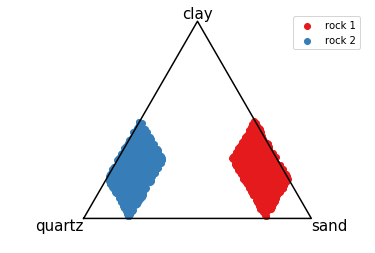

In [7]:
ternary_plot(df)

## Real data to download
http://www.subsurfwiki.org/wiki/Rock_Property_Catalog